In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import rc
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc 
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import graphviz
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
row_data='/Users/gimdohyeon/Documents/캡스톤디자인/데이터/fire_dataset.csv'
data=pd.read_csv(row_data, encoding='euc-kr')

data=data.dropna()
data=data.reset_index(drop=True)

In [4]:
# x=data.drop('재산피해소계', axis=1)
data=data.drop(['발화열원','발화열원소분류','발화요인소분류','최초착화물소분류','발화관련기기소분류','건물상태','장소대분류','장소소분류','발화지점대분류','층수(지상)','층수(지하)','화재유형',
            '발화지점소분류'],axis=1)

In [5]:
x=data
x.columns

Index(['재산피해소계', '건물층수(지상)', '건물층수(지하)', '발화층', '소방서거리(㎞)', '발화요인대분류',
       '최초착화물대분류', '발화관련기기대분류', '펌프물탱크', '날씨', '온도(℃)', '습도', '풍속', '풍향',
       '건물구조조', '건물구조즙', '장소중분류', '특정소방대상물', '방화관리대상여부', '다중이용업여부'],
      dtype='object')

In [6]:
x['건물층수']=x['건물층수(지상)']+x['건물층수(지하)']
x=x.drop(['건물층수(지상)','건물층수(지하)','발화층'], axis=1)

In [6]:
#cols=x.columns
#data_uni=[]

#for i in range(len(cols)):
#    if x[cols[i]].dtypes=='object':
#        data_uni.append(x[cols[i]].unique())
#    else:
#        continue

In [7]:
# 문자열인 각 x변수의 속성보고 제거할지 결정
#data_uni

In [7]:
x=x.drop(['발화요인대분류','최초착화물대분류','발화관련기기대분류','장소중분류',
          '펌프물탱크','다중이용업여부','방화관리대상여부','건물구조조','날씨','온도(℃)'], axis=1)
x=x.dropna()
x.reset_index(drop=True)

,재산피해소계,소방서거리(㎞),습도,풍속,풍향,건물구조즙,특정소방대상물,건물층수
0,5490,2.1,93.0,북동,0~4 m/s,슬라브가,공장,3.0
1,19,4.0,0.0,NONE,NONE,슬라브가,공동주택,19.0
2,11,1.3,67.0,북서,0~4 m/s,슬라브가,근린생활시설,5.0
3,0,3.0,0.0,북서,0~4 m/s,슬라브가,근린생활시설,9.0
4,32750,2.6,94.0,북동,0~4 m/s,슬라브가,공장,4.0
...,...,...,...,...,...,...,...,...
6827,0,2.0,26.0,북서,0~4 m/s,슬라브가,근린생활시설,2.0
6828,485,5.7,36.0,북,0~4 m/s,슬라브가,판매시설 및 영업시설,3.0
6829,61,3.5,82.5,북,0~4 m/s,슬라브가,근린생활시설,4.0
6830,110,1.5,35.0,북서,0~4 m/s,슬라브가,판매시설 및 영업시설,9.0


In [8]:
ind_x=x[x['풍속']=='NONE'].index
x=x.drop(ind_x)

In [9]:
x=x.reset_index(drop=True)
#x.풍향.replace({'NONE':'0~4 m/s'},inplace=True)

In [10]:
rc('font',family='AppleGothic',size=8)
plt.rcParams['axes.unicode_minus']=False

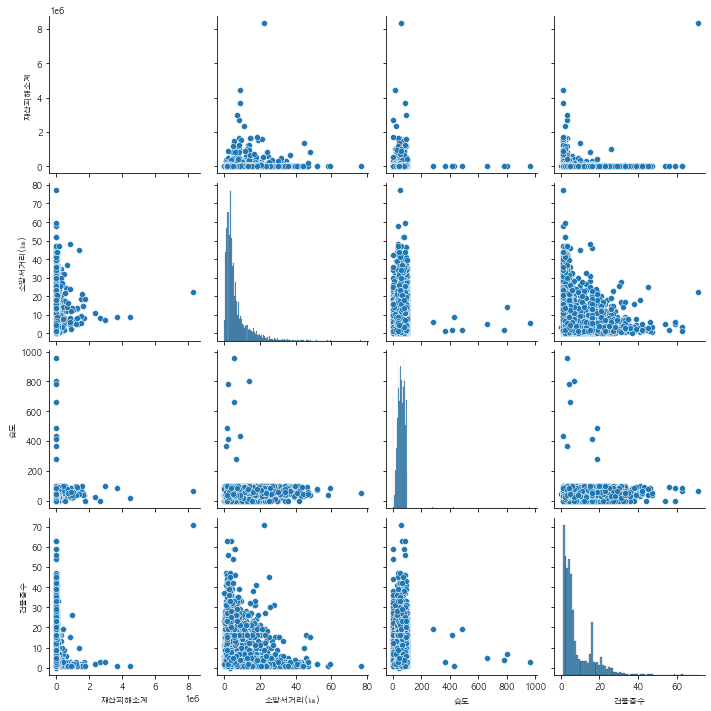

In [12]:
#sns.pairplot(x)

In [11]:
cols=x.columns
objcols=[]

for i in range(len(cols)):
    if x[cols[i]].dtypes=='object':
        objcols.append(cols[i])

In [12]:
objcols

['풍속', '풍향', '건물구조즙', '특정소방대상물']

In [13]:
def Label(df):
    features=objcols
    for feature in features:
        le=LabelEncoder()
        df[feature]=le.fit_transform(df[feature])
    return df

In [14]:
# 각 레이블 인코더 변환 확인하는 함수 
le_df=[]
for i in range(len(objcols)):
    le=LabelEncoder()
    col=x[objcols[i]].unique()
    col_le=le.fit_transform(col)
    col_inv=le.inverse_transform(col_le)
    df=pd.DataFrame(col_le, col_inv)
    le_df.append(df)

In [15]:
x

,재산피해소계,소방서거리(㎞),습도,풍속,풍향,건물구조즙,특정소방대상물,건물층수
0,5490,2.1,93.0,북동,0~4 m/s,슬라브가,공장,3.0
1,11,1.3,67.0,북서,0~4 m/s,슬라브가,근린생활시설,5.0
2,0,3.0,0.0,북서,0~4 m/s,슬라브가,근린생활시설,9.0
3,32750,2.6,94.0,북동,0~4 m/s,슬라브가,공장,4.0
4,2329,3.0,82.0,동,0~4 m/s,슬라브가,공동주택,21.0
...,...,...,...,...,...,...,...,...
6316,0,2.0,26.0,북서,0~4 m/s,슬라브가,근린생활시설,2.0
6317,485,5.7,36.0,북,0~4 m/s,슬라브가,판매시설 및 영업시설,3.0
6318,61,3.5,82.5,북,0~4 m/s,슬라브가,근린생활시설,4.0
6319,110,1.5,35.0,북서,0~4 m/s,슬라브가,판매시설 및 영업시설,9.0


In [16]:
y=x.재산피해소계
bins=[0,120,700,5000]
y=np.digitize(y, bins)
y=pd.Series(y, name='재산피해소계')

In [17]:
x['재산피해소계']=y

In [18]:
Y=x.재산피해소계
x=x.drop('재산피해소계', axis=1)
x_original=x.copy()

# 원본 데이터에서 문자열 속성만 LabelEncoder()
X=Label(x)

Counter({4: 1439, 1: 1641, 3: 1605, 2: 1636})

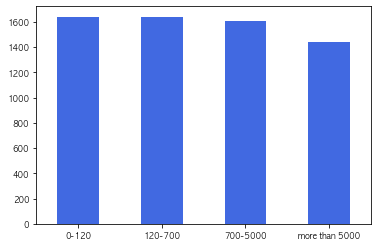

In [19]:
plot=Y.value_counts().sort_index(ascending=True).plot.bar(color='royalblue')
plot.set_xticklabels(['0-120','120-700','700-5000','more than 5000'], rotation=0)

# 재산피해액(y)의 값에 따라 4개의 레이블로 나눈다.
import collections
dict={}
dict=collections.Counter(Y)
dict # 각 레이블 갯수 비교

In [21]:
# 모델 학습
#X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=.25, random_state=42)

#tree=DecisionTreeClassifier(max_depth=10,
#                            min_samples_leaf=30,
#                            min_samples_split=30,
#                            max_leaf_nodes=30,
#                            splitter='best',
#                            criterion='gini')

#tree=DecisionTreeClassifier(max_depth=25,
#                            min_samples_leaf=10,
#                            min_samples_split=50,
#                            max_leaf_nodes=17,
#                            splitter='best',
#                            criterion='gini')

#tree=DecisionTreeClassifier(max_depth=20,
#                            min_samples_leaf=10,
#                            min_samples_split=10,
#                            splitter='best',
#                            criterion='gini')


#tree=DecisionTreeClassifier(max_depth=50,
#                            min_samples_leaf=3,
#                            #min_samples_split=5,
#                            min_samples_split=10,
#                            splitter='best',                           
#                            criterion='gini')

In [20]:
# 모델 학습
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=.25, random_state=42)


tree=DecisionTreeClassifier(max_depth=50,
                            min_samples_leaf=3,
                            #min_samples_split=5,
                            min_samples_split=10,
                            splitter='best',                           
                            criterion='gini')

In [21]:
tree.fit(X_train, y_train)
print('Training accuracy: ',tree.score(X_train, y_train))
y_pred=tree.predict(X_test)

Training accuracy:  0.6751054852320675


In [22]:
accuracy_score(y_test, y_pred)

0.2928526249209361

In [23]:
# Decision Tree 확인
export_graphviz(tree,
                out_file="tree.dot",
                feature_names=X.columns,
                #class_names=['관심','주의','경고','위험'],
                class_names=['0-120','120-700','700-5000','more than 5000'],
                rounded=True, #둥근 노드 상자와 Helvetica 폰트 사용
                filled=True #노드의 클래스가 구분되도록 색을 채워줌
                )

with open("tree.dot") as f:
    dot_graph=f.read()   
   
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename="tree_0508", directory="/Users/gimdohyeon/Desktop/캡스톤디자인(2)/tree_model", cleanup=True) #트리 저장할때마다 파일명 바꿔주기

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.68989 to fit


'/Users/gimdohyeon/Desktop/캡스톤디자인(2)/tree_model/tree_0508.png'

In [24]:
print(tree.feature_importances_)

[0.27547386 0.27655284 0.12579122 0.00991933 0.07513942 0.10132113
 0.1358022 ]


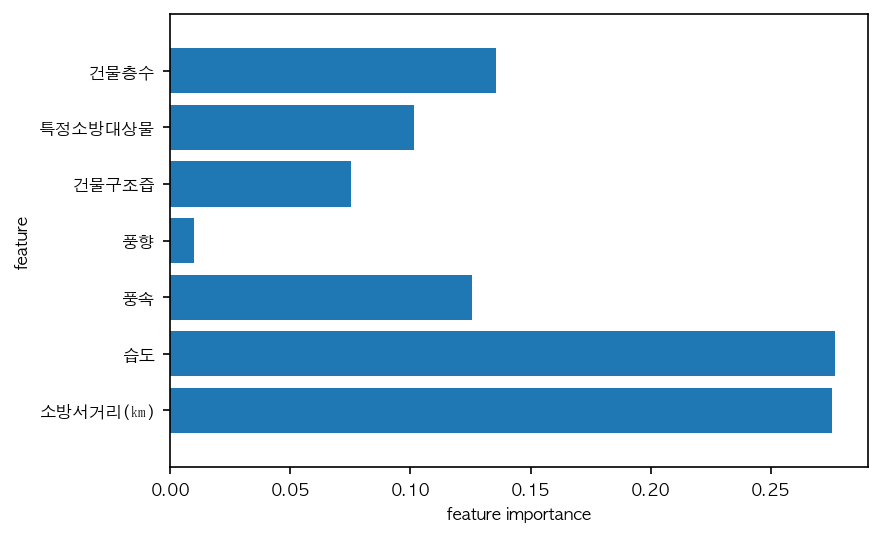

In [25]:
def plot_feature_importance(model):
    n_features=X.shape[1]
    plt.figure(dpi=150) #고해상도 plot(기본100)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

plot_feature_importance(tree)

In [27]:
x_original

,소방서거리(㎞),습도,풍속,풍향,건물구조즙,특정소방대상물,건물층수
0,2.1,93.0,북동,0~4 m/s,슬라브가,공장,3.0
1,1.3,67.0,북서,0~4 m/s,슬라브가,근린생활시설,5.0
2,3.0,0.0,북서,0~4 m/s,슬라브가,근린생활시설,9.0
3,2.6,94.0,북동,0~4 m/s,슬라브가,공장,4.0
4,3.0,82.0,동,0~4 m/s,슬라브가,공동주택,21.0
...,...,...,...,...,...,...,...
6316,2.0,26.0,북서,0~4 m/s,슬라브가,근린생활시설,2.0
6317,5.7,36.0,북,0~4 m/s,슬라브가,판매시설 및 영업시설,3.0
6318,3.5,82.5,북,0~4 m/s,슬라브가,근린생활시설,4.0
6319,1.5,35.0,북서,0~4 m/s,슬라브가,판매시설 및 영업시설,9.0


In [28]:
X

,소방서거리(㎞),습도,풍속,풍향,건물구조즙,특정소방대상물,건물층수
0,2.1,93.0,5,0,5,1,3.0
1,1.3,67.0,6,0,5,5,5.0
2,3.0,0.0,6,0,5,5,9.0
3,2.6,94.0,5,0,5,1,4.0
4,3.0,82.0,3,0,5,0,21.0
...,...,...,...,...,...,...,...
6316,2.0,26.0,6,0,5,5,2.0
6317,5.7,36.0,4,0,5,23,3.0
6318,3.5,82.5,4,0,5,5,4.0
6319,1.5,35.0,6,0,5,23,9.0


In [29]:
Y

0       4
1       1
2       1
3       4
4       3
       ..
6316    1
6317    2
6318    1
6319    1
6320    3
Name: 재산피해소계, Length: 6321, dtype: int64

In [243]:
#models=[RandomForestClassifier(), SVC()]

In [244]:
#scores=[]
#accuracy=[]

In [ ]:
#for model in models:
#    model.fit(X_train, y_train)
#    scores.append(model.score(X_train, y_train))
#    y_pred=model.predict(X_test)
#    accuracy.append(accuracy_score(y_test, y_pred))
#    print(confusion_matrix(y_test,y_pred))
#    print(classification_report(y_test, y_pred))

In [246]:
#scores

[0.9995780590717299, 0.35527426160337555]

In [247]:
#accuracy

[0.34724857685009486, 0.3225806451612903]

In [ ]:
#RF_model=RandomForestClassifier(n_estimators=5, random_state=1)

In [26]:
RF_model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                                criterion='gini', max_depth=None, max_features='auto',
                                min_impurity_decrease=0.0,
                                n_estimators=5, random_state=1)

In [27]:
RF_model.fit(X_train,y_train)
print('RandomForest Training accuracy: ', RF_model.score(X_train, y_train))

RandomForest Training accuracy:  0.9263713080168776


In [28]:
SVC_model=SVC(C=10, gamma=0.1)

In [29]:
#SVC_model=SVC(C=10, gamma=0.1, kernel='poly',degree=3)
SVC_model.fit(X_train, y_train)
print('SVM Training accuracy: ', SVC_model.score(X_train, y_train))

SVM Training accuracy:  0.9645569620253165


SVM 매개변수 => C, gamma

매개변수 선택방법 => grid search

grid search: 여러 조합을 테스트하여 가장 좋은 성능을 내는 매개변수를 찾음

In [ ]:
from sklearn.pipeline import make_pipeline
clf=make_pipeline(tree, RF_model, SVC_model)
clf=
clf.fit(X_train, y_train)
print('Piepeline model accuracy: ', clf.score(X_train, y_train))

In [ ]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([("scaler", MinMaxScaler()), ("svm", SVC_model), ("")])

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_tree=Pipeline([('scl', StandardScaler()), ('clf', tree)])
pipe_RF=Pipeline([('scl', StandardScaler()), ('clf', RF_model)])
pipe_SVC=Pipeline([('scl', StandardScaler()), ('clf', SVC_model)])

Standard Scaler은 Decision Tree에 많은 영향을 안준다.

In [38]:
pipe_tree.fit(X_train, y_train)
pipe_tree.score(X_train, y_train)

0.6755274261603376

In [39]:
pipe_RF.fit(X_train, y_train)
pipe_RF.score(X_train, y_train)

0.9244725738396624

In [40]:
pipe_SVC.fit(X_train, y_train)
pipe_SVC.score(X_train, y_train)

0.4272151898734177

In [44]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('tr',tree), ('rf', RF_model), ('svc', SVC_model)],
                       voting="hard")
voting.fit(X_train, y_train)
voting.score(X_train, y_train)

0.9518987341772152